In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
consumption = pd.read_csv("dataset/food_consumption.csv")

In [4]:
consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [7]:
n= consumption[consumption["country"]=="Belgium"]
be_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
396,397,Belgium,pork,38.65,136.80
397,398,Belgium,poultry,12.20,13.11
398,399,Belgium,beef,15.63,482.31
399,400,Belgium,lamb_goat,1.32,46.23
400,401,Belgium,fish,18.97,30.29
401,402,Belgium,eggs,12.59,11.57
402,403,Belgium,dairy,236.19,336.43
403,404,Belgium,wheat,111.91,21.34
404,405,Belgium,rice,8.61,11.02
405,406,Belgium,soybeans,0.07,0.03


In [8]:
# Filter for USA
usa_consumption = consumption[consumption["country"]=="USA"]
usa_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
55,56,USA,pork,27.64,97.83
56,57,USA,poultry,50.01,53.72
57,58,USA,beef,36.24,1118.29
58,59,USA,lamb_goat,0.43,15.06
59,60,USA,fish,12.35,19.72
60,61,USA,eggs,14.58,13.39
61,62,USA,dairy,254.69,362.78
62,63,USA,wheat,80.43,15.34
63,64,USA,rice,6.88,8.80
64,65,USA,soybeans,0.04,0.02


In [9]:
# Calculate mean and median consumption in Belgium
np.mean(be_consumption["consumption"])

42.132727272727266

In [10]:
np.median(be_consumption["consumption"])

12.59

In [11]:
# Calculate mean and median consumption in USA
np.mean(usa_consumption["consumption"])

44.650000000000006

In [12]:
np.median(usa_consumption["consumption"])

14.58

In [13]:
# Subset for Belgium and USA only
be_and_usa = consumption[(consumption["country"]=="USA") | (consumption["country"]=="Belgium")]
be_and_usa

,Unnamed: 0,country,food_category,consumption,co2_emission
55,56,USA,pork,27.64,97.83
56,57,USA,poultry,50.01,53.72
57,58,USA,beef,36.24,1118.29
58,59,USA,lamb_goat,0.43,15.06
59,60,USA,fish,12.35,19.72
60,61,USA,eggs,14.58,13.39
61,62,USA,dairy,254.69,362.78
62,63,USA,wheat,80.43,15.34
63,64,USA,rice,6.88,8.80
64,65,USA,soybeans,0.04,0.02


In [14]:
# Group by country, select consumption column, and compute mean and median
be_and_usa.groupby("country")["consumption"].agg(["mean","median"])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


In [18]:
# Subset for food_category equals rice
rice_consumption = consumption[consumption['food_category']=="rice"]
rice_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
8,9,Argentina,rice,8.77,11.22
19,20,Australia,rice,11.03,14.12
30,31,Albania,rice,7.78,9.96
41,42,Iceland,rice,3.89,4.98
52,53,New Zealand,rice,9.16,11.72
...,...,...,...,...,...
1383,1384,Sierra Leone,rice,103.30,132.19
1394,1395,Sri Lanka,rice,109.72,140.41
1405,1406,Indonesia,rice,134.62,172.27
1416,1417,Liberia,rice,94.75,121.25


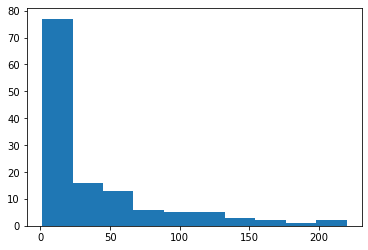

In [19]:
plt.hist(rice_consumption["co2_emission"])
plt.show()

In [20]:
# Calculate mean and median of co2_emission with .agg()
rice_consumption["co2_emission"].agg(["mean","median"])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

In [22]:
# Calculate the quartiles of co2_emission
np.quantile(consumption["co2_emission"],[0,0.25,0.5, 0.75,1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [23]:
# Calculate the quintiles of co2_emission
np.quantile(consumption["co2_emission"],[0,0.20,0.40, 0.60,0.80,1.0])

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [24]:
# Calculate the deciles of co2_emission

np.quantile(consumption["co2_emission"],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

In [25]:
# Print variance and sd of co2_emission for each food_category
consumption.groupby("food_category")["co2_emission"].agg([np.var,np.std])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


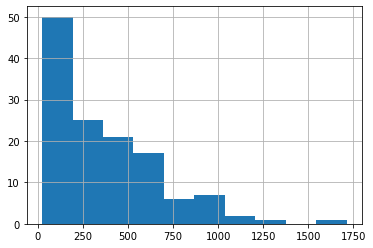

In [27]:
# Create histogram of co2_emission for food_category 'beef'
consumption[consumption["food_category"]== "beef"]["co2_emission"].hist()
plt.show();

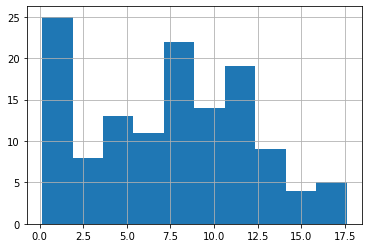

In [28]:
# Create histogram of co2_emission for food_category 'eggs'
consumption[consumption["food_category"]== "eggs"]["co2_emission"].hist()
# Show plot
plt.show()

In [30]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = consumption.groupby("country")["co2_emission"].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [31]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,0.25)
q3 = np.quantile(emissions_by_country,0.75)
iqr = q3 -q1

In [32]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 -1.5*iqr
upper = q3+1.5*iqr

In [33]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
